In [ ]:
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [ ]:
def log1p(vec):
    return np.log1p(abs(vec))

def expm1(x):
    return np.expm1(x)

In [ ]:
cost = df_train['Cost']
df_train["Cost"] = log1p(cost)

In [ ]:
df_train

Customer Id          Artist Name  Artist Reputation  Height  \
0     fffe3900350033003300        Billy Jenkins               0.26    17.0   
1     fffe3800330031003900          Jean Bryant               0.28     3.0   
2     fffe3600370035003100         Laura Miller               0.07     8.0   
3         fffe350031003300       Robert Chaires               0.12     9.0   
4     fffe3900320038003400         Rosalyn Krol               0.15    17.0   
...                    ...                  ...                ...     ...   
6495  fffe3800370037003300  Jeffrey Freudenthal               0.37    37.0   
6496      fffe310036003400        Larry Edwards               0.67    15.0   
6497  fffe3600300031003300         Denise Worth               0.68    19.0   
6498  fffe3600350035003900          Daniel Drew               0.02    33.0   
6499  fffe3700310031003600       Vernon Carroll               0.18    30.0   

      Width     Weight   Material  Price Of Sculpture  Base Shipping Price  \
0       6.0     4128.0      Brass               13.91                16.27   
1       3.0       61.0      Brass                6.83                15.00   
2       5.0      237.0       Clay                4.96                21.18   
3       NaN        NaN  Aluminium                5.81                16.31   
4       6.0      324.0  Aluminium                3.18                11.94   
...     ...        ...        ...                 ...                  ...   
6495   10.0    16551.0      Brass               28.28                38.46   
6496    NaN    18981.0        NaN               67.18                27.72   
6497    8.0      587.0       Clay                6.92                10.38   
6498    9.0  1269377.0      Stone             2929.13                69.76   
6499   13.0    34729.0      Brass               46.63                78.25   

     International Express Shipment Installation Included Transport Fragile  \
0              Yes              Yes                    No   Airways      No   
1               No               No                    No  Roadways      No   
2               No               No                    No  Roadways     Yes   
3               No               No                    No       NaN      No   
4              Yes              Yes                   Yes   Airways      No   
...            ...              ...                   ...       ...     ...   
6495           Yes              Yes                    No   Airways      No   
6496            No               No                    No  Roadways      No   
6497           Yes               No                    No       NaN     Yes   
6498            No              Yes                    No  Roadways      No   
6499            No              Yes                    No   Airways      No   

     Customer Information Remote Location Scheduled Date Delivery Date  \
0           Working Class              No       06/07/15      06/03/15   
1           Working Class              No       03/06/17      03/05/17   
2           Working Class             Yes       03/09/15      03/08/15   
3                 Wealthy             Yes       05/24/15      05/20/15   
4           Working Class              No       12/18/16      12/14/16   
...                   ...             ...            ...           ...   
6495              Wealthy             Yes       03/28/18      03/25/18   
6496        Working Class              No       08/29/15      08/27/15   
6497              Wealthy              No       04/10/19      04/09/19   
6498        Working Class             Yes       03/10/19      03/12/19   
6499        Working Class              No       12/03/16      12/05/16   

              Customer Location      Cost  
0        New Michelle, OH 50777  5.649995  
1     New Michaelport, WY 12072  5.081156  
2         Bowmanshire, WA 19241  5.045294  
3          East Robyn, KY 86375  5.088584  
4           Aprilside, PA 52793  5.076610  
...                         ...       .

In [ ]:
df_train.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [ ]:
df_test

Customer Id       Artist Name  Artist Reputation  Height  \
0     fffe3400310033003300      James Miller               0.35    53.0   
1     fffe3600350035003400     Karen Vetrano               0.67     7.0   
2     fffe3700360030003500    Roseanne Gaona               0.61     6.0   
3         fffe350038003600      Todd Almanza               0.14    15.0   
4     fffe3500390032003500    Francis Rivero               0.63    10.0   
...                    ...               ...                ...     ...   
3495  fffe3200300037003100    Orlando Miller               0.36    13.0   
3496      fffe390031003100    Javier Loughry               0.72    29.0   
3497  fffe3200350031003700  Lashawnda Walton               0.59    12.0   
3498  fffe3100380031003000       Rita Battee                NaN    17.0   
3499  fffe3200340037003300        Paul Jones               0.97    25.0   

      Width    Weight   Material  Price Of Sculpture  Base Shipping Price  \
0      18.0     871.0       Wood                5.98                19.11   
1       4.0     108.0       Clay                6.92                13.96   
2       5.0      97.0  Aluminium                4.23                13.62   
3       8.0     757.0       Clay                6.28                23.79   
4       4.0    1673.0     Marble                4.39                17.83   
...     ...       ...        ...                 ...                  ...   
3495    6.0   23511.0     Marble               78.01                88.70   
3496   14.0       NaN     Bronze              214.85                80.28   
3497    6.0       NaN      Brass                8.91                19.58   
3498    9.0     565.0  Aluminium                6.75                10.89   
3499   11.0  989903.0      Stone             4768.42                31.38   

     International Express Shipment Installation Included Transport Fragile  \
0              Yes              Yes                    No   Airways      No   
1               No               No                    No  Roadways     Yes   
2              Yes               No                    No   Airways      No   
3               No              Yes                    No  Roadways     Yes   
4               No              Yes                   Yes  Roadways      No   
...            ...              ...                   ...       ...     ...   
3495            No              Yes                    No   Airways      No   
3496           Yes              Yes                    No   Airways      No   
3497            No               No                   Yes   Airways      No   
3498            No              Yes                   Yes   Airways      No   
3499            No              Yes                    No   Airways      No   

     Customer Information Remote Location Scheduled Date Delivery Date  \
0           Working Class              No       07/03/17      07/06/17   
1           Working Class              No       05/02/16      05/02/16   
2           Working Class              No       01/04/18      01/06/18   
3                 Wealthy              No       09/14/17      09/17/17   
4           Working Class             Yes       12/03/17      12/02/17   
...                   ...             ...            ...           ...   
3495              Wealthy              No       02/09/16      02/09/16   
3496              Wealthy              No       11/26/18      11/30/18   
3497        Working Class              No       04/01/17      04/02/17   
3498              Wealthy              No       06/28/17      06/28/17   
3499        Working Class              No       02/19/19      02/15/19   

             Customer Location  
0        Santoshaven, IA 63481  
1        Ericksonton, OH 98253  
2                 APO AP 83453  
3     Antonioborough, AL 54778  
4       Lake Frances, LA 03040  
...                        ...  
3495      Smithville, IA 22615  
3496     Kennethstad, NE 65012  
3497  Lake Christian, AL 95571  
3498     West Regina,

In [ ]:
df_train.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [ ]:
df_test.isnull().sum()

Customer Id                0
Artist Name                0
Artist Reputation        222
Height                   119
Width                    141
Weight                   149
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                232
Fragile                    0
Customer Information       0
Remote Location            0
Scheduled Date             0
Delivery Date              0
Customer Location          0
dtype: int64

In [ ]:
df_train.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [ ]:
df_train.corr()

Artist Reputation    Height     Width    Weight  \
Artist Reputation             1.000000 -0.000513 -0.009203  0.017113   
Height                       -0.000513  1.000000  0.768376  0.226543   
Width                        -0.009203  0.768376  1.000000  0.329603   
Weight                        0.017113  0.226543  0.329603  1.000000   
Price Of Sculpture            0.054286  0.200942  0.293544  0.890205   
Base Shipping Price          -0.011820  0.353858  0.332361  0.150856   
Cost                          0.347732  0.470148  0.476109  0.457549   

                     Price Of Sculpture  Base Shipping Price      Cost  
Artist Reputation              0.054286            -0.011820  0.347732  
Height                         0.200942             0.353858  0.470148  
Width                          0.293544             0.332361  0.476109  
Weight                         0.890205             0.150856  0.457549  
Price Of Sculpture             1.000000             0.134407  0.447333  
Base Shipping Price            0.134407             1.000000  0.608811  
Cost                           0.447333             0.608811  1.000000

In [ ]:
report_train = pandas_profiling.ProfileReport(df_train)

In [ ]:
report_train

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_train["Artist Reputation"].value_counts()

0.36    90
0.38    85
0.22    79
0.17    79
0.39    79
        ..
0.99    29
0.95    27
0.98    25
0.00    22
1.00    12
Name: Artist Reputation, Length: 101, dtype: int64

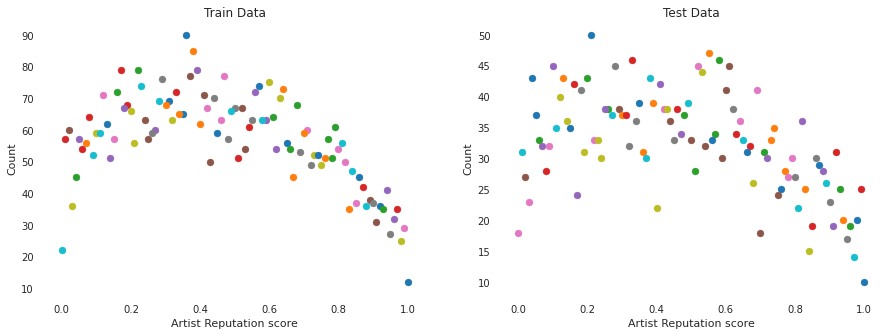

In [ ]:
plot = plt.figure(figsize=(15,5))
ax1 = plot.add_subplot(121)
ax2 = plot.add_subplot(122)
for i,j in df_train["Artist Reputation"].value_counts().iteritems():
    ax1.scatter(i,j,cmap='viridis')
    ax1.set_title('Train Data')
    ax1.set_xlabel('Artist Reputation score')
    ax1.set_ylabel('Count')
for i,j in df_test["Artist Reputation"].value_counts().iteritems():
    ax2.scatter(i, j, cmap='viridis_r')
    ax2.set_title('Test Data')
    ax2.set_xlabel('Artist Reputation score')
    ax2.set_ylabel('Count')

In [ ]:
mean_to_be_filled = ["Artist Reputation","Height","Width","Weight"]
not_available_to_be_filled = ["Transport","Material","Remote Location"]

In [ ]:
def fill_mean(df):
    values = []
    counts = []
    for i,j in df.value_counts().iteritems():
        values.append(i)
        counts.append(j)
    weighted_avg_artist_reputation = np.average(values,weights=counts)
    df.fillna(weighted_avg_artist_reputation,inplace = True)

In [ ]:
for i in mean_to_be_filled:
    fill_mean(df_train[i])
    fill_mean(df_test[i])

In [ ]:
def fill_not_available(df):
    df.fillna(df.mode()[0],inplace=True)

In [ ]:
for i in not_available_to_be_filled:
    fill_not_available(df_train[i])
    fill_not_available(df_test[i])

In [ ]:
list_weight = df_train[df_train["Weight"].isna()].index

list_width = df_train[df_train["Width"].isna()].index

list_height = df_train[df_train["Height"].isna()].index

list_weight_to_be_updated = df_train[df_train["Weight"].isna() & df_train["Height"].notna() & df_train["Width"].notna()].index

list_weight_height_width_available = df_train[df_train["Weight"].notna() & df_train["Height"].notna() & df_train["Width"].notna()].index

In [ ]:
list_height_width_na = list(set(list_height) & set(list_width))

In [ ]:
df_train.iloc[list_weight_to_be_updated].head()

Empty DataFrame
Columns: [Customer Id, Artist Name, Artist Reputation, Height, Width, Weight, Material, Price Of Sculpture, Base Shipping Price, International, Express Shipment, Installation Included, Transport, Fragile, Customer Information, Remote Location, Scheduled Date, Delivery Date, Customer Location, Cost]
Index: []

In [ ]:
df_train.iloc[list_weight_to_be_updated].groupby("Material")["Height","Weight","Width"].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [Height, Weight, Width]
Index: []

In [ ]:
df_train.iloc[list_weight_height_width_available].groupby("Material")["Height","Weight","Width"].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Height        Weight     Width
Material                                    
Aluminium  22.072833  2.781694e+04  9.721406
Brass      21.531828  2.014202e+05  9.422171
Bronze     22.118938  5.577008e+04  9.811313
Clay       21.605613  3.799369e+04  9.637363
Marble     21.277515  7.287720e+05  9.521906
Stone      21.627177  2.017262e+06  9.678871
Wood       22.339109  3.130225e+04  9.719723

In [ ]:
df_train.iloc[list_weight_height_width_available].head()

Customer Id     Artist Name  Artist Reputation  Height     Width  \
0  fffe3900350033003300   Billy Jenkins               0.26    17.0  6.000000   
1  fffe3800330031003900     Jean Bryant               0.28     3.0  3.000000   
2  fffe3600370035003100    Laura Miller               0.07     8.0  5.000000   
3      fffe350031003300  Robert Chaires               0.12     9.0  9.617647   
4  fffe3900320038003400    Rosalyn Krol               0.15    17.0  6.000000   

          Weight   Material  Price Of Sculpture  Base Shipping Price  \
0    4128.000000      Brass               13.91                16.27   
1      61.000000      Brass                6.83                15.00   
2     237.000000       Clay                4.96                21.18   
3  400694.821918  Aluminium                5.81                16.31   
4     324.000000  Aluminium                3.18                11.94   

  International Express Shipment Installation Included Transport Fragile  \
0           Yes              Yes                    No   Airways      No   
1            No               No                    No  Roadways      No   
2            No               No                    No  Roadways     Yes   
3            No               No                    No  Roadways      No   
4           Yes              Yes                   Yes   Airways      No   

  Customer Information Remote Location Scheduled Date Delivery Date  \
0        Working Class              No       06/07/15      06/03/15   
1        Working Class              No       03/06/17      03/05/17   
2        Working Class             Yes       03/09/15      03/08/15   
3              Wealthy             Yes       05/24/15      05/20/15   
4        Working Class              No       12/18/16      12/14/16   

           Customer Location      Cost  
0     New Michelle, OH 50777  5.649995  
1  New Michaelport, WY 12072  5.081156  
2      Bowmanshire, WA 19241  5.045294  
3       East Robyn, KY 86375  5.088584  
4        Aprilside, PA 52793  5.076610

In [ ]:
df_train

Customer Id          Artist Name  Artist Reputation  Height  \
0     fffe3900350033003300        Billy Jenkins               0.26    17.0   
1     fffe3800330031003900          Jean Bryant               0.28     3.0   
2     fffe3600370035003100         Laura Miller               0.07     8.0   
3         fffe350031003300       Robert Chaires               0.12     9.0   
4     fffe3900320038003400         Rosalyn Krol               0.15    17.0   
...                    ...                  ...                ...     ...   
6495  fffe3800370037003300  Jeffrey Freudenthal               0.37    37.0   
6496      fffe310036003400        Larry Edwards               0.67    15.0   
6497  fffe3600300031003300         Denise Worth               0.68    19.0   
6498  fffe3600350035003900          Daniel Drew               0.02    33.0   
6499  fffe3700310031003600       Vernon Carroll               0.18    30.0   

          Width        Weight   Material  Price Of Sculpture  \
0      6.000000  4.128000e+03      Brass               13.91   
1      3.000000  6.100000e+01      Brass                6.83   
2      5.000000  2.370000e+02       Clay                4.96   
3      9.617647  4.006948e+05  Aluminium                5.81   
4      6.000000  3.240000e+02  Aluminium                3.18   
...         ...           ...        ...                 ...   
6495  10.000000  1.655100e+04      Brass               28.28   
6496   9.617647  1.898100e+04      Brass               67.18   
6497   8.000000  5.870000e+02       Clay                6.92   
6498   9.000000  1.269377e+06      Stone             2929.13   
6499  13.000000  3.472900e+04      Brass               46.63   

      Base Shipping Price International Express Shipment  \
0                   16.27           Yes              Yes   
1                   15.00            No               No   
2                   21.18            No               No   
3                   16.31            No               No   
4                   11.94           Yes              Yes   
...                   ...           ...              ...   
6495                38.46           Yes              Yes   
6496                27.72            No               No   
6497                10.38           Yes               No   
6498                69.76            No              Yes   
6499                78.25            No              Yes   

     Installation Included Transport Fragile Customer Information  \
0                       No   Airways      No        Working Class   
1                       No  Roadways      No        Working Class   
2                       No  Roadways     Yes        Working Class   
3                       No  Roadways      No              Wealthy   
4                      Yes   Airways      No        Working Class   
...                    ...       ...     ...                  ...   
6495                    No   Airways      No              Wealthy   
6496                    No  Roadways      No        Working Class   
6497                    No  Roadways     Yes              Wealthy   
6498                    No  Roadways      No        Working Class   
6499                    No   Airways      No        Working Class   

     Remote Location Scheduled Date Delivery Date          Customer Location  \
0                 No       06/07/15      06/03/15     New Michelle, OH 50777   
1                 No       03/06/17      03/05/17  New Michaelport, WY 12072   
2                Yes       03/09/15      03/08/15      Bowmanshire, WA 19241   
3                Yes       05/24/15      05/20/15       East Robyn, KY 86375   
4                 No       12/18/16      12/14/16        Aprilside, PA 52793   
...              ...            ...           ...                        ...   
6495             Yes       03/28/18      03/25/18       New Robert, VT 85335   
6496              No       08/29/15      08/27/15       New Joshua, VA 35766   
6497              No       04/10/19    

In [ ]:
df_test

Customer Id       Artist Name  Artist Reputation  Height  \
0     fffe3400310033003300      James Miller           0.350000    53.0   
1     fffe3600350035003400     Karen Vetrano           0.670000     7.0   
2     fffe3700360030003500    Roseanne Gaona           0.610000     6.0   
3         fffe350038003600      Todd Almanza           0.140000    15.0   
4     fffe3500390032003500    Francis Rivero           0.630000    10.0   
...                    ...               ...                ...     ...   
3495  fffe3200300037003100    Orlando Miller           0.360000    13.0   
3496      fffe390031003100    Javier Loughry           0.720000    29.0   
3497  fffe3200350031003700  Lashawnda Walton           0.590000    12.0   
3498  fffe3100380031003000       Rita Battee           0.463279    17.0   
3499  fffe3200340037003300        Paul Jones           0.970000    25.0   

      Width         Weight   Material  Price Of Sculpture  \
0      18.0     871.000000       Wood                5.98   
1       4.0     108.000000       Clay                6.92   
2       5.0      97.000000  Aluminium                4.23   
3       8.0     757.000000       Clay                6.28   
4       4.0    1673.000000     Marble                4.39   
...     ...            ...        ...                 ...   
3495    6.0   23511.000000     Marble               78.01   
3496   14.0  374966.487616     Bronze              214.85   
3497    6.0  374966.487616      Brass                8.91   
3498    9.0     565.000000  Aluminium                6.75   
3499   11.0  989903.000000      Stone             4768.42   

      Base Shipping Price International Express Shipment  \
0                   19.11           Yes              Yes   
1                   13.96            No               No   
2                   13.62           Yes               No   
3                   23.79            No              Yes   
4                   17.83            No              Yes   
...                   ...           ...              ...   
3495                88.70            No              Yes   
3496                80.28           Yes              Yes   
3497                19.58            No               No   
3498                10.89            No              Yes   
3499                31.38            No              Yes   

     Installation Included Transport Fragile Customer Information  \
0                       No   Airways      No        Working Class   
1                       No  Roadways     Yes        Working Class   
2                       No   Airways      No        Working Class   
3                       No  Roadways     Yes              Wealthy   
4                      Yes  Roadways      No        Working Class   
...                    ...       ...     ...                  ...   
3495                    No   Airways      No              Wealthy   
3496                    No   Airways      No              Wealthy   
3497                   Yes   Airways      No        Working Class   
3498                   Yes   Airways      No              Wealthy   
3499                    No   Airways      No        Working Class   

     Remote Location Scheduled Date Delivery Date         Customer Location  
0                 No       07/03/17      07/06/17     Santoshaven, IA 63481  
1                 No       05/02/16      05/02/16     Ericksonton, OH 98253  
2                 No       01/04/18      01/06/18              APO AP 83453  
3                 No       09/14/17      09/17/17  Antonioborough, AL 54778  
4                Yes       12/03/17      12/02/17    Lake Frances, LA 03040  
...              ...            ...           ...                       ...  
3495              No       02/09/16      02/09/16      Smithville, IA 22615  
3496              No       11/26/18      11/30/18     Kennethstad, NE 65012  
3497              No       04/01/17      04/02/17  Lake Christian, AL 95571  
3498              No       06/28/17      06/28/17  

In [ ]:
def clean_weight(df):
    converted_list_1 = []
    for i in df:
        converted_list_1.append(round(float(i),2))
    return converted_list_1

df_train["Weight"] = clean_weight(df_train["Weight"])

df_test["Weight"] = clean_weight(df_test["Weight"])

In [ ]:
df_train

Customer Id          Artist Name  Artist Reputation  Height  \
0     fffe3900350033003300        Billy Jenkins               0.26    17.0   
1     fffe3800330031003900          Jean Bryant               0.28     3.0   
2     fffe3600370035003100         Laura Miller               0.07     8.0   
3         fffe350031003300       Robert Chaires               0.12     9.0   
4     fffe3900320038003400         Rosalyn Krol               0.15    17.0   
...                    ...                  ...                ...     ...   
6495  fffe3800370037003300  Jeffrey Freudenthal               0.37    37.0   
6496      fffe310036003400        Larry Edwards               0.67    15.0   
6497  fffe3600300031003300         Denise Worth               0.68    19.0   
6498  fffe3600350035003900          Daniel Drew               0.02    33.0   
6499  fffe3700310031003600       Vernon Carroll               0.18    30.0   

          Width      Weight   Material  Price Of Sculpture  \
0      6.000000     4128.00      Brass               13.91   
1      3.000000       61.00      Brass                6.83   
2      5.000000      237.00       Clay                4.96   
3      9.617647   400694.82  Aluminium                5.81   
4      6.000000      324.00  Aluminium                3.18   
...         ...         ...        ...                 ...   
6495  10.000000    16551.00      Brass               28.28   
6496   9.617647    18981.00      Brass               67.18   
6497   8.000000      587.00       Clay                6.92   
6498   9.000000  1269377.00      Stone             2929.13   
6499  13.000000    34729.00      Brass               46.63   

      Base Shipping Price International Express Shipment  \
0                   16.27           Yes              Yes   
1                   15.00            No               No   
2                   21.18            No               No   
3                   16.31            No               No   
4                   11.94           Yes              Yes   
...                   ...           ...              ...   
6495                38.46           Yes              Yes   
6496                27.72            No               No   
6497                10.38           Yes               No   
6498                69.76            No              Yes   
6499                78.25            No              Yes   

     Installation Included Transport Fragile Customer Information  \
0                       No   Airways      No        Working Class   
1                       No  Roadways      No        Working Class   
2                       No  Roadways     Yes        Working Class   
3                       No  Roadways      No              Wealthy   
4                      Yes   Airways      No        Working Class   
...                    ...       ...     ...                  ...   
6495                    No   Airways      No              Wealthy   
6496                    No  Roadways      No        Working Class   
6497                    No  Roadways     Yes              Wealthy   
6498                    No  Roadways      No        Working Class   
6499                    No   Airways      No        Working Class   

     Remote Location Scheduled Date Delivery Date          Customer Location  \
0                 No       06/07/15      06/03/15     New Michelle, OH 50777   
1                 No       03/06/17      03/05/17  New Michaelport, WY 12072   
2                Yes       03/09/15      03/08/15      Bowmanshire, WA 19241   
3                Yes       05/24/15      05/20/15       East Robyn, KY 86375   
4                 No       12/18/16      12/14/16        Aprilside, PA 52793   
...              ...            ...           ...                        ...   
6495             Yes       03/28/18      03/25/18       New Robert, VT 85335   
6496              No       08/29/15      08/27/15       New Joshua, VA 35766   
6497              No       04/10/19      04/09/19       Lake Ke

In [ ]:
df_test

Customer Id       Artist Name  Artist Reputation  Height  \
0     fffe3400310033003300      James Miller           0.350000    53.0   
1     fffe3600350035003400     Karen Vetrano           0.670000     7.0   
2     fffe3700360030003500    Roseanne Gaona           0.610000     6.0   
3         fffe350038003600      Todd Almanza           0.140000    15.0   
4     fffe3500390032003500    Francis Rivero           0.630000    10.0   
...                    ...               ...                ...     ...   
3495  fffe3200300037003100    Orlando Miller           0.360000    13.0   
3496      fffe390031003100    Javier Loughry           0.720000    29.0   
3497  fffe3200350031003700  Lashawnda Walton           0.590000    12.0   
3498  fffe3100380031003000       Rita Battee           0.463279    17.0   
3499  fffe3200340037003300        Paul Jones           0.970000    25.0   

      Width     Weight   Material  Price Of Sculpture  Base Shipping Price  \
0      18.0     871.00       Wood                5.98                19.11   
1       4.0     108.00       Clay                6.92                13.96   
2       5.0      97.00  Aluminium                4.23                13.62   
3       8.0     757.00       Clay                6.28                23.79   
4       4.0    1673.00     Marble                4.39                17.83   
...     ...        ...        ...                 ...                  ...   
3495    6.0   23511.00     Marble               78.01                88.70   
3496   14.0  374966.49     Bronze              214.85                80.28   
3497    6.0  374966.49      Brass                8.91                19.58   
3498    9.0     565.00  Aluminium                6.75                10.89   
3499   11.0  989903.00      Stone             4768.42                31.38   

     International Express Shipment Installation Included Transport Fragile  \
0              Yes              Yes                    No   Airways      No   
1               No               No                    No  Roadways     Yes   
2              Yes               No                    No   Airways      No   
3               No              Yes                    No  Roadways     Yes   
4               No              Yes                   Yes  Roadways      No   
...            ...              ...                   ...       ...     ...   
3495            No              Yes                    No   Airways      No   
3496           Yes              Yes                    No   Airways      No   
3497            No               No                   Yes   Airways      No   
3498            No              Yes                   Yes   Airways      No   
3499            No              Yes                    No   Airways      No   

     Customer Information Remote Location Scheduled Date Delivery Date  \
0           Working Class              No       07/03/17      07/06/17   
1           Working Class              No       05/02/16      05/02/16   
2           Working Class              No       01/04/18      01/06/18   
3                 Wealthy              No       09/14/17      09/17/17   
4           Working Class             Yes       12/03/17      12/02/17   
...                   ...             ...            ...           ...   
3495              Wealthy              No       02/09/16      02/09/16   
3496              Wealthy              No       11/26/18      11/30/18   
3497        Working Class              No       04/01/17      04/02/17   
3498              Wealthy              No       06/28/17      06/28/17   
3499        Working Class              No       02/19/19      02/15/19   

             Customer Location  
0        Santoshaven, IA 63481  
1        Ericksonton, OH 98253  
2                 APO AP 83453  
3     Antonioborough, AL 54778  
4       Lake Frances, LA 03040  
...                        ...  
3495      Smithville, IA 22615  
3496     Kennethstad, NE 65012  
3497  Lake Christian, AL 95571  
3498     

In [ ]:
def change_date_time(df,i):
    return pd.to_datetime(df[i])

In [ ]:
cols_to_change_date = ["Scheduled Date","Delivery Date"]

In [ ]:
for i in cols_to_change_date:
    df_train[i] = change_date_time(df_train,i)
    df_test[i] = change_date_time(df_test,i)
    

In [ ]:
def clean_date(df):
    converted_list_1 = []
    date_diff = df["Scheduled Date"]-df["Delivery Date"]
    
    for i in date_diff:
        converted_list_1.append(str(i).split()[0])
    return converted_list_1

In [ ]:
df_train["date_diff"] = clean_date(df_train)
df_test["date_diff"] = clean_date(df_test)

df_train["date_diff"] = df_train["date_diff"].astype("int")
df_test["date_diff"] = df_test["date_diff"].astype("int")

In [ ]:
df_train

Customer Id          Artist Name  Artist Reputation  Height  \
0     fffe3900350033003300        Billy Jenkins               0.26    17.0   
1     fffe3800330031003900          Jean Bryant               0.28     3.0   
2     fffe3600370035003100         Laura Miller               0.07     8.0   
3         fffe350031003300       Robert Chaires               0.12     9.0   
4     fffe3900320038003400         Rosalyn Krol               0.15    17.0   
...                    ...                  ...                ...     ...   
6495  fffe3800370037003300  Jeffrey Freudenthal               0.37    37.0   
6496      fffe310036003400        Larry Edwards               0.67    15.0   
6497  fffe3600300031003300         Denise Worth               0.68    19.0   
6498  fffe3600350035003900          Daniel Drew               0.02    33.0   
6499  fffe3700310031003600       Vernon Carroll               0.18    30.0   

          Width      Weight   Material  Price Of Sculpture  \
0      6.000000     4128.00      Brass               13.91   
1      3.000000       61.00      Brass                6.83   
2      5.000000      237.00       Clay                4.96   
3      9.617647   400694.82  Aluminium                5.81   
4      6.000000      324.00  Aluminium                3.18   
...         ...         ...        ...                 ...   
6495  10.000000    16551.00      Brass               28.28   
6496   9.617647    18981.00      Brass               67.18   
6497   8.000000      587.00       Clay                6.92   
6498   9.000000  1269377.00      Stone             2929.13   
6499  13.000000    34729.00      Brass               46.63   

      Base Shipping Price International  ... Installation Included Transport  \
0                   16.27           Yes  ...                    No   Airways   
1                   15.00            No  ...                    No  Roadways   
2                   21.18            No  ...                    No  Roadways   
3                   16.31            No  ...                    No  Roadways   
4                   11.94           Yes  ...                   Yes   Airways   
...                   ...           ...  ...                   ...       ...   
6495                38.46           Yes  ...                    No   Airways   
6496                27.72            No  ...                    No  Roadways   
6497                10.38           Yes  ...                    No  Roadways   
6498                69.76            No  ...                    No  Roadways   
6499                78.25            No  ...                    No   Airways   

     Fragile Customer Information Remote Location Scheduled Date  \
0         No        Working Class              No     2015-06-07   
1         No        Working Class              No     2017-03-06   
2        Yes        Working Class             Yes     2015-03-09   
3         No              Wealthy             Yes     2015-05-24   
4         No        Working Class              No     2016-12-18   
...      ...                  ...             ...            ...   
6495      No              Wealthy             Yes     2018-03-28   
6496      No        Working Class              No     2015-08-29   
6497     Yes              Wealthy              No     2019-04-10   
6498      No        Working Class             Yes     2019-03-10   
6499      No        Working Class              No     2016-12-03   

     Delivery Date          Customer Location      Cost  date_diff  
0       2015-06-03     New Michelle, OH 50777  5.649995          4  
1       2017-03-05  New Michaelport, WY 12072  5.081156          1  
2       2015-03-08      Bowmanshire, WA 19241  5.045294          1  
3       2015-05-20       East Robyn, KY 86375  5.088584          4  
4       2016-12-14        Aprilside, PA 52793  5.076610          4  
...            ...                        ...       ...        ...  
6495    2018-03-25       New Robert, VT 85335  6.772428          3  
649

In [ ]:
def clean_customer_location(df):
    converted_list_1 = []
    
    for i in df:
        converted_list_1.append(i.split()[-2])
    return converted_list_1

In [ ]:
df_train["Customer Location"] = clean_customer_location(df_train["Customer Location"])
df_test["Customer Location"] = clean_customer_location(df_test["Customer Location"])

In [ ]:
cols_to_be_one_hot_encoded = ["Material","Transport","Customer Location"]
cols_to_be_ordinally_encoded = ["International","Express Shipment","Installation Included","Fragile","Customer Information","Remote Location"]

In [ ]:
def one_hot_encoding(df,column):
    one_hot_encoder=ce.OneHotEncoder(cols=column,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

In [ ]:
for i in cols_to_be_one_hot_encoded:
    df_train = one_hot_encoding(df_train,i)
    df_test = one_hot_encoding(df_test,i)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: Future

In [ ]:
def ordinal_encoding(df,column):
    ordinal_encoder = ce.OrdinalEncoder(cols = column,return_df = True,mapping=[{'col':column,'mapping':{'Yes':1,'No':0,'Working Class':0,'Wealthy':1}}])
    df_final=ordinal_encoder.fit_transform(df) 
    return df_final

In [ ]:
for i in cols_to_be_ordinally_encoded:
    df_train = ordinal_encoding(df_train,i)
    df_test = ordinal_encoding(df_test,i)

In [ ]:
new_order = list(df_train.columns)
new_order.remove("Cost")

In [ ]:
df_test = df_test.reindex(columns=new_order)

In [ ]:
columns_to_drop = ["Customer Id","Artist Name","Remote Location","Scheduled Date","Delivery Date"]

In [ ]:
def drop_columns(df):
    df.drop(columns_to_drop,axis = 1,inplace = True)
    
drop_columns(df_train)
drop_columns(df_test)

In [ ]:
df_train

Artist Reputation  Height      Width      Weight  Material_Brass  \
0                  0.26    17.0   6.000000     4128.00               1   
1                  0.28     3.0   3.000000       61.00               1   
2                  0.07     8.0   5.000000      237.00               0   
3                  0.12     9.0   9.617647   400694.82               0   
4                  0.15    17.0   6.000000      324.00               0   
...                 ...     ...        ...         ...             ...   
6495               0.37    37.0  10.000000    16551.00               1   
6496               0.67    15.0   9.617647    18981.00               1   
6497               0.68    19.0   8.000000      587.00               0   
6498               0.02    33.0   9.000000  1269377.00               0   
6499               0.18    30.0  13.000000    34729.00               1   

      Material_Clay  Material_Aluminium  Material_Wood  Material_Marble  \
0                 0                   0              0                0   
1                 0                   0              0                0   
2                 1                   0              0                0   
3                 0                   1              0                0   
4                 0                   1              0                0   
...             ...                 ...            ...              ...   
6495              0                   0              0                0   
6496              0                   0              0                0   
6497              1                   0              0                0   
6498              0                   0              0                0   
6499              0                   0              0                0   

      Material_Bronze  ...  Customer Location_AK  Customer Location_NY  \
0                   0  ...                     0                     0   
1                   0  ...                     0                     0   
2                   0  ...                     0                     0   
3                   0  ...                     0                     0   
4                   0  ...                     0                     0   
...               ...  ...                   ...                   ...   
6495                0  ...                     0                     0   
6496                0  ...                     0                     0   
6497                0  ...                     0                     0   
6498                0  ...                     0                     0   
6499                0  ...                     1                     0   

      Customer Location_NJ  Customer Location_TN  Customer Location_NE  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
6495                     0                     0                     0   
6496                     0                     0                     0   
6497                     0                     0                     0   
6498                     0                     0                     0   
6499                     0                     0                     0   

      Customer Location_MO  Customer Location_IN  Customer Location_UT  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                    

In [ ]:
for i,j in df_train.dtypes.iteritems():
    print(i,j)

Artist Reputation float64
Height float64
Width float64
Weight float64
Material_Brass int64
Material_Clay int64
Material_Aluminium int64
Material_Wood int64
Material_Marble int64
Material_Bronze int64
Material_Stone int64
Price Of Sculpture float64
Base Shipping Price float64
International int64
Express Shipment int64
Installation Included int64
Transport_Airways int64
Transport_Roadways int64
Transport_Waterways int64
Fragile int64
Customer Information int64
Customer Location_OH int64
Customer Location_WY int64
Customer Location_WA int64
Customer Location_KY int64
Customer Location_PA int64
Customer Location_AL int64
Customer Location_WV int64
Customer Location_CA int64
Customer Location_ND int64
Customer Location_GA int64
Customer Location_DC int64
Customer Location_TX int64
Customer Location_CO int64
Customer Location_AE int64
Customer Location_OR int64
Customer Location_MI int64
Customer Location_NM int64
Customer Location_AR int64
Customer Location_AP int64
Customer Location_VT int

In [ ]:
X_train = df_train.drop("Cost",axis = 1)
Y_train = df_train["Cost"]
X_test = df_test.copy()

In [ ]:
st = StandardScaler()

In [ ]:
df_train_standardized = st.fit_transform(X_train)
df_test_standardized = st.fit_transform(X_test)

In [ ]:
df_train_final = pd.DataFrame(df_train_standardized,columns = X_train.columns)
df_test_final = pd.DataFrame(df_test_standardized,columns=df_test.columns)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df_train_final, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Y_prediction_rf = abs(rf.predict(df_test_final))

In [ ]:
Y_prediction_rf

array([ 5.53535654,  5.52585308,  5.54543335, ...,  5.58013788,
        5.44933399, 12.75576049])

In [ ]:
Y_pred = []
for i in Y_prediction_rf:
    Y_pred.append(round(float(i),2))

In [ ]:
df_submission = pd.DataFrame()
df_submission["Customer Id"] = df_test_copy["Customer Id"]
df_submission["Cost"] = Y_pred
Y_pred = expm1(Y_pred)

In [ ]:
df_submission.to_csv("submission_rf_basic.csv")

In [ ]:
param_grid = [
{'n_estimators': [50,100,250,500], 
 'max_depth': [10, 50, 100], 'bootstrap': [True, False]}
]

In [ ]:
random_search_forest = RandomizedSearchCV(rf, param_grid, cv=10)

In [ ]:
random_search_forest.fit(df_train_final, Y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 50, 100],
                                         'n_estimators': [50, 100, 250, 500]}])

In [ ]:
tuned_rf_best_random = random_search_forest.best_estimator_

In [ ]:
tuned_rf_best_random

RandomForestRegressor(max_depth=100, n_estimators=500, random_state=42)

In [ ]:
tuned_rf_best_random.fit(df_train_final, Y_train)

RandomForestRegressor(max_depth=100, n_estimators=500, random_state=42)

In [ ]:
tuned_rf_random_pred = abs(tuned_rf_best_random.predict(df_test_final))

In [ ]:
tuned_rf_random_pred = expm1(tuned_rf_random_pred)

In [ ]:
df_submission = pd.DataFrame()
df_submission["Customer Id"] = df_test_copy["Customer Id"]
df_submission["Cost"] = tuned_rf_random_pred

In [ ]:
df_submission.to_csv("submission_rf_hyperparameters.csv")

In [ ]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, Y_train)
y_test_pred_lgbm = lgbm.predict(X_test)
y_test_pred_lgbm2 = expm1(y_test_pred_lgbm)

In [ ]:
df_submission_lgbm = pd.DataFrame()
df_submission_lgbm["Customer Id"] = df_test_copy["Customer Id"]
df_submission_lgbm["Cost"] = y_test_pred_lgbm2

In [ ]:
df_submission_lgbm.to_csv("submission_lgbm.csv")